<h1>OCD Project</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<b>Upload and Clean SurveyI SurveyII SurveyII</b>

In [2]:
TextFileReader1 = pd.read_csv('..\SurveyI.csv',error_bad_lines=False,chunksize=1000)

df1List = []
for df in TextFileReader1:
    df1List.append(df)
    
df1 = pd.concat(df1List,sort=False)
df1 = df1.replace(' ',-1)
df1 = df1.astype('int64',errors='ignore')
df1 = df1.apply(lambda x: x.astype('int64',errors='ignore'))
df1 = df1.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [3]:
TextFileReader2 = pd.read_csv('..\SurveyII.csv',error_bad_lines=False,chunksize=1000)

dfList2 = []
for df in TextFileReader2:
    dfList2.append(df)
    
df2 = pd.concat(dfList2,sort=False)
df2 = df2.replace(' ',-1)
df2 = df2.astype('int64',errors='ignore')
df2 = df2.apply(lambda x: x.astype('int64',errors='ignore'))
df2 = df2.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

In [4]:
TextFileReader3 = pd.read_csv('..\SurveyIII.csv',error_bad_lines=False,chunksize=1000)

dfList3 = []
for df in TextFileReader3:
    dfList3.append(df)
    
df3 = pd.concat(dfList3,sort=False)
df3 = df3.replace(' ',-1)
df3 = df3.astype('int64',errors='ignore')
df3 = df3.apply(lambda x: x.astype('int64',errors='ignore'))
df3 = df3.apply(lambda x: x.astype('float64',errors='ignore') if x.dtype == 'O' else x)

<h4>Counts of People reported to have OCD</h2>

In [8]:
print("Survey I")
print(df1['NQ31B1'].value_counts())
print("Survey II")
print(df2['NQ31B1'].value_counts())
print("Survey III")
print(df3['NQ31B1'].value_counts())

Survey I
 1    366332
-1      5616
 2      3123
 3      1604
 5      1494
 4      1061
 6       354
Name: NQ31B1, dtype: int64
Survey II
 1    482168
-1      7300
 2      4972
 5      2215
 3      2160
 4      1573
 6       472
Name: NQ31B1, dtype: int64
Survey III
 1    342893
-1      4814
 2      4695
 3      2035
 5      1976
 4      1665
 6       375
Name: NQ31B1, dtype: int64


<h4>Removing Data Points with implausible height weight and BMI</h4>

In [75]:
df1_bool = ((df1['NQ49_FT'] >= 3.937) & (df1['NQ49_FT'] <= 6.89) & (df1['NQ50'] >= 77.16) & (df1['NQ50'] <= 396.832) & (df1['BMI'] >= 16) & (df1['BMI'] <= 65))
print("Data before trim: " + str(len(df1)))
print("Data after trim: " + str(len(df1[df1_bool])))
df1 = df1[df1_bool]

Data before trim: 379584
Data after trim: 364006


In [78]:
df2_bool = ((df2['NQ49'] >= 47.2441) & (df2['NQ49'] <= 82.6772) & (df2['NQ50'] >= 77.16) & (df2['NQ50'] <= 396.832) & (df2['BMI'] >= 16) & (df2['BMI'] <= 65))
print("Data before trim: " + str(len(df2)))
print("Data after trim: " + str(len(df2[df2_bool])))
df2 = df2[df2_bool]

Data before trim: 500860
Data after trim: 482185


In [80]:
df3_bool = ((df3['NQ49'] >= 47.2441) & (df3['NQ49'] <= 82.6772) & (df3['NQ50'] >= 77.16) & (df3['NQ50'] <= 396.832) & (df3['BMI'] >= 16) & (df3['BMI'] <= 65))
print("Data before trim: " + str(len(df3)))
print("Data after trim: " + str(len(df3[df3_bool])))
df3 = df3[df3_bool]

Data before trim: 358453
Data after trim: 335756


<h4>Merge Data Frames</h4>

In [81]:
data_ocd = pd.concat([df1,df2,df3],axis=0,sort = True)

<h4>Total size of Data Before Trimming</h4>

In [10]:
data_ocd.shape

(1238897, 185)

<h4>After Trim</h4>

In [82]:
data_ocd.shape

(1197525, 185)

<h4>Total survey results</h4>

In [83]:
data_ocd['NQ31B1'].value_counts()

 1    1159415
 2      12266
-1       9637
 3       5525
 5       5476
 4       4122
 6       1084
Name: NQ31B1, dtype: int64

In [116]:
label = []
k = 0
j = 2008
for i in range(18,39):
    if(k == 0):
        label.append("Fall" + str(j))
        k = 1
        j += 1
    else:
        label.append("Spring" + str(j))
        k = 0
        
label

['Fall2008',
 'Spring2009',
 'Fall2009',
 'Spring2010',
 'Fall2010',
 'Spring2011',
 'Fall2011',
 'Spring2012',
 'Fall2012',
 'Spring2013',
 'Fall2013',
 'Spring2014',
 'Fall2014',
 'Spring2015',
 'Fall2015',
 'Spring2016',
 'Fall2016',
 'Spring2017',
 'Fall2017',
 'Spring2018',
 'Fall2018']

<h4>OCD Rate Between Terms</h4>

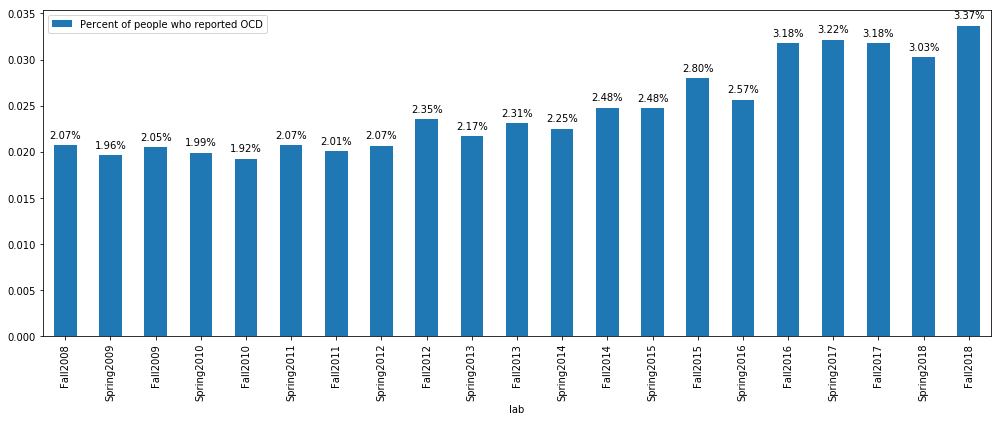

In [155]:
def plot_ocd_ratio(data_ocd):  
    
    ratio = []
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        ratio.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))

    ocd_plot = pd.DataFrame({'lab':label, 'val':ratio})
    #plt.bar(ocd_plot,label="Percent of people who reported OCD",figsize=(18,6))
    ax = ocd_plot.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4")
    add_value_labels(ax)

plot_ocd_ratio(data_ocd)

<h4>OCD Report By Year</h4>

In [22]:
label_year = []
for i in range(2008,2019):
    label_year.append(i)
label_year

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]

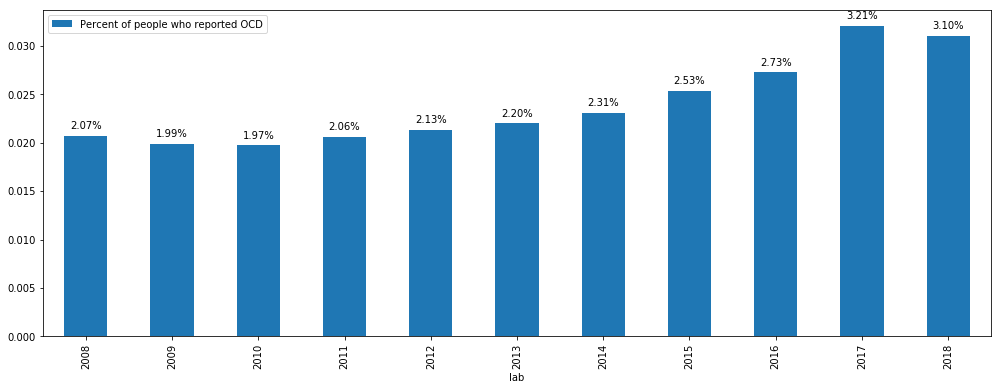

In [154]:
def ocd_year(data_ocd):  
    
    ratio = []
    temp_prevalence = 0
    temp_length = 0
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        temp_prevalence += data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() 
        temp_length += len(data.NQ31B1)
        if(answer % 2 == 0):
            ratio.append(temp_prevalence * 1.0 / temp_length)
            temp_prevalence = 0
            temp_length = 0

    ocd_plot = pd.DataFrame({'lab':label_year, 'val':ratio})
    #plt.bar(ocd_plot,label="Percent of people who reported OCD",figsize=(18,6))
    ax = ocd_plot.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4")
    add_value_labels(ax)

ocd_year(data_ocd)

<h4>Seasonal Trends</h4>

In [151]:
def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = "{:.2f}%".format(y_value*100)
        #label = str(label * 100) + "%"
        
        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      # Vertically align label differently for


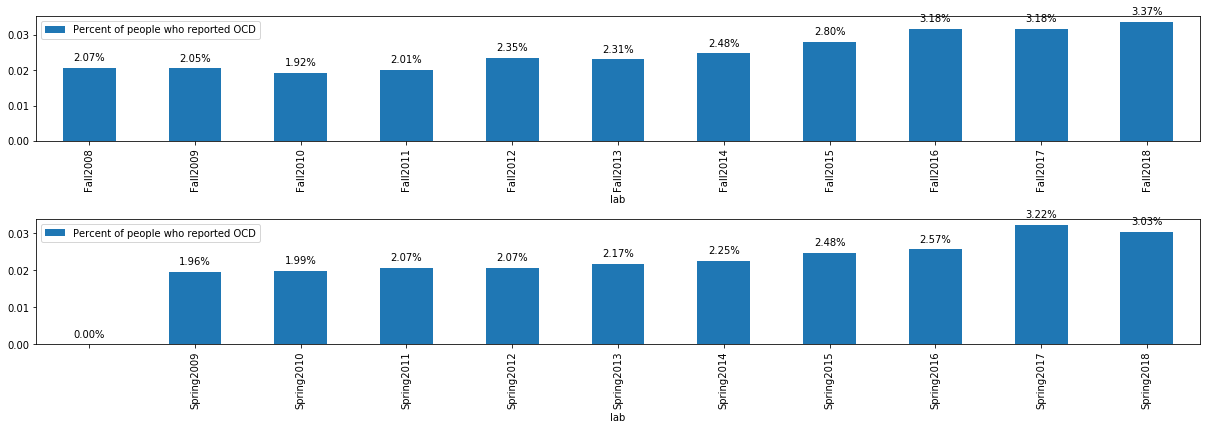

In [152]:
fig, axes = plt.subplots(2, 1, figsize=(12, 20))

def ocd_year(data_ocd):  
    
    ratio_Fall = []
    ratio_Spring = []
    
    for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
        data = data_ocd[(data_ocd['STUDY'] == answer)]
        if(answer % 2 == 0): # Fall
            ratio_Fall.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))
        else:
            ratio_Spring.append(data.NQ31B1[(data['NQ31B1'] != 1) & (data['NQ31B1'] != -1)].value_counts().sum() / len(data.NQ31B1))
    
    plot_fall = pd.DataFrame({'lab':label[::2], 'val':ratio_Fall})
    plot_fall.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4", ax = axes[0])
    add_value_labels(axes[0])
    
    label_Spring = label[1::2]
    label_Spring.insert(0,"")
    ratio_Spring.insert(0,0)
    plot_spring = pd.DataFrame({'lab':label_Spring, 'val':ratio_Spring})
    plot_spring.plot.bar(x='lab',y='val',label="Percent of people who reported OCD",figsize=(17,6),color="#1f77b4", ax = axes[1])
    add_value_labels(axes[1])
    fig.tight_layout()
    
ocd_year(data_ocd)

<b>Graph of responses per year</b>

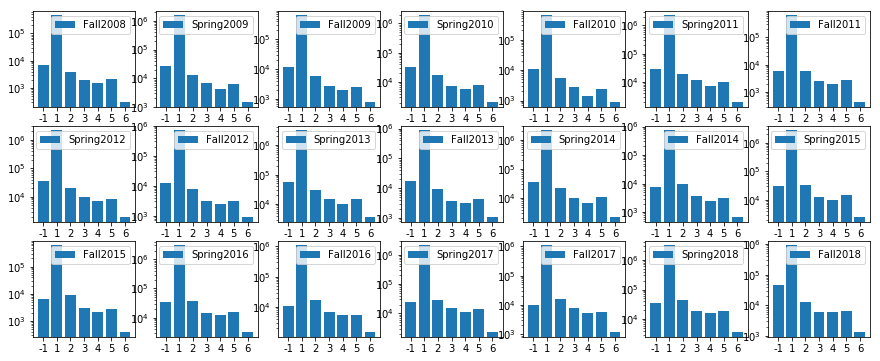

In [39]:
fig, axes = plt.subplots(3, 7, figsize=(15, 6))
i = 0
j = 0
for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['STUDY'] == answer)]
    data = data.groupby(['NQ31B1']).STUDY.sum()
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[j,i].bar(left,right,label= (label[7*j + i]),log=True)
    axes[j,i].set_xticks(left, minor=False)
    axes[j,i].set_xticklabels(data.index.values)
    axes[j,i].legend(loc='best')
    if(i == 6):
        i = 0
        j += 1
    else:
        i += 1
    

<h4>Graph Percentages of responses by year</h4>

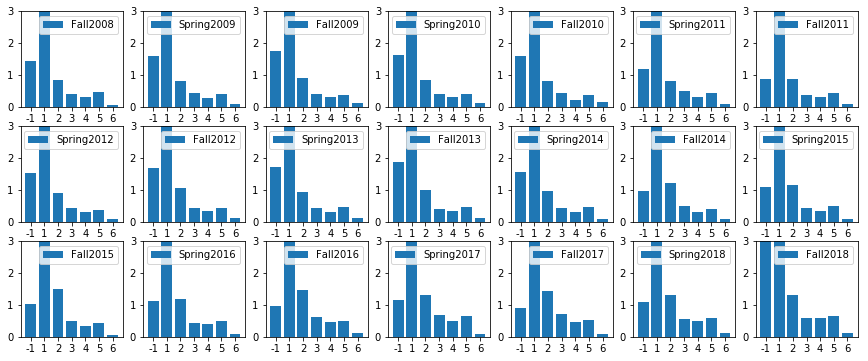

In [40]:
fig, axes = plt.subplots(3, 7, figsize=(15, 6))
i = 0
j = 0
for x,answer in enumerate(data_ocd.STUDY.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['STUDY'] == answer)]
    data = data.groupby(['NQ31B1']).STUDY.sum() / sum(data.groupby(['NQ31B1']).STUDY.sum()) * 100
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[j,i].bar(left,right,label= (label[7*j + i]))
    axes[j,i].set_xticks(left, minor=False)
    axes[j,i].set_xticklabels(data.index.values)
    axes[j,i].legend(loc='best')
    axes[j,i].set_ylim(0,3)
    if(i == 6):
        i = 0
        j += 1
    else:
        i += 1
    

<h4>Drop all columns that aren't in all the datasets</h4>

In [44]:
data_ocd = data_ocd.dropna(axis=1)

In [45]:
data_ocd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238897 entries, 0 to 358452
Data columns (total 74 columns):
ACHAMEM    1238897 non-null int64
BAC        1238897 non-null float64
BMI        1238897 non-null float64
HBCU       1238897 non-null int64
HHE        1238897 non-null int64
HS         1238897 non-null int64
LOCALE     1238897 non-null int64
NQ31A1     1238897 non-null int64
NQ31A2     1238897 non-null int64
NQ31A3     1238897 non-null int64
NQ31A4     1238897 non-null int64
NQ31A5     1238897 non-null int64
NQ31A6     1238897 non-null int64
NQ31A7     1238897 non-null int64
NQ31A8     1238897 non-null int64
NQ31B1     1238897 non-null int64
NQ31B2     1238897 non-null int64
NQ31B3     1238897 non-null int64
NQ31B4     1238897 non-null int64
NQ31B5     1238897 non-null int64
NQ31B6     1238897 non-null int64
NQ31B7     1238897 non-null int64
NQ34A      1238897 non-null int64
NQ34B      1238897 non-null int64
NQ34C      1238897 non-null int64
NQ34D      1238897 non-null int64


<h1>------------------------------Stop----------------------------------</h1>

In [19]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [33]:
importances = model.feature_importances_
importances

array([0.00470045, 0.01884137, 0.02183617, 0.00056126, 0.00187745,
       0.00329971, 0.01603265, 0.0123819 , 0.04638267, 0.01222955,
       0.0091138 , 0.0083697 , 0.03824658, 0.01365826, 0.01034446,
       0.04770276, 0.02419984, 0.04941525, 0.04357459, 0.01510258,
       0.035972  , 0.02979811, 0.02601865, 0.01113389, 0.03545817,
       0.01661258, 0.02067704, 0.02177495, 0.01621937, 0.00575869,
       0.01036404, 0.00424723, 0.00248586, 0.0045443 , 0.00315491,
       0.00230715, 0.00302845, 0.00265505, 0.0050028 , 0.01369667,
       0.00662014, 0.01449011, 0.00740737, 0.01761814, 0.01526941,
       0.01145176, 0.01566311, 0.00511992, 0.00919235, 0.00789751,
       0.006051  , 0.00681351, 0.02510181, 0.0075365 , 0.00311278,
       0.00384338, 0.00891216, 0.00295317, 0.00596298, 0.02541397,
       0.02097921, 0.00080542, 0.00626258, 0.00787476, 0.01045735,
       0.01436885, 0.01492909, 0.00509815, 0.02092499, 0.        ,
       0.00337624, 0.00464018, 0.01507122])

In [24]:
indices = np.argsort(importances)[::-1]
indices

array([17, 15,  8, 18, 12, 20, 24, 21, 22, 59, 52, 16,  2, 27, 60, 68, 26,
        1, 43, 25, 28,  6, 46, 44, 19, 72, 66, 41, 65, 39, 13,  7,  9, 45,
       23, 64, 30, 14, 48, 10, 56, 11, 49, 63, 53, 42, 51, 40, 62, 50, 58,
       29, 47, 67, 38,  0, 71, 33, 31, 55, 70,  5, 34, 54, 36, 57, 37, 32,
       35,  4, 61,  3, 69], dtype=int64)

In [30]:
X.columns[indices]

Index(['NQ31B4', 'NQ31B2', 'NQ31A2', 'NQ31B5', 'NQ31A6', 'NQ31B7', 'NQ34D',
       'NQ34A', 'NQ34B', 'PAREQ', 'NQ65C', 'NQ31B3', 'BMI', 'NQ50', 'PERMID',
       'STUDY', 'NQ46', 'BAC', 'NQ60', 'NQ35', 'NQ51', 'LOCALE', 'NQ63',
       'NQ61', 'NQ31B6', 'size', 'REGION', 'NQ58', 'RBMI', 'NQ56', 'NQ31A7',
       'NQ31A1', 'NQ31A3', 'NQ62', 'NQ34C', 'RBAC2', 'NQ53', 'NQ31A8', 'NQ64B',
       'NQ31A4', 'NQ65G', 'NQ31A5', 'NQ64C', 'RBAC1', 'NQ65D', 'NQ59', 'NQ65B',
       'NQ57', 'PUBPRIV', 'NQ65A', 'NQ65I', 'NQ52', 'NQ64A', 'REL', 'NQ55',
       'ACHAMEM', 'pwno', 'NQ54C', 'NQ54A', 'NQ65F', 'TYPE', 'HS', 'NQ54D',
       'NQ65E', 'NQ54F', 'NQ65H', 'NQ54G', 'NQ54B', 'NQ54E', 'HHE', 'PMI',
       'HBCU', 'TCU'],
      dtype='object')

In [34]:
df = data_ocd.drop(['Year'],axis=1)
df.corr()['NQ31B1'][:]

ACHAMEM   -0.006035
BAC        0.158285
BMI        0.139570
HBCU      -0.005992
HHE       -0.013681
             ...   
STUDY      0.019622
TCU             NaN
TYPE       0.019216
pwno       0.055936
size      -0.011423
Name: NQ31B1, Length: 74, dtype: float64

In [41]:
df.corr()['NQ31B1'][:].sort_values()[::-1][2:15]

NQ31B3    0.478222
NQ31B4    0.454124
NQ31B6    0.451380
NQ31B2    0.402257
NQ31A5    0.384281
NQ31A1    0.383290
NQ31A4    0.374819
NQ31B5    0.373841
NQ31A2    0.359965
NQ34B     0.354722
NQ31A7    0.343061
NQ31B7    0.339596
NQ65G     0.331812
Name: NQ31B1, dtype: float64

In [40]:
df.corr()['NQ31B1'][:].sort_values()[::-1][0:15]

TCU            NaN
NQ31B1    1.000000
NQ31B3    0.478222
NQ31B4    0.454124
NQ31B6    0.451380
NQ31B2    0.402257
NQ31A5    0.384281
NQ31A1    0.383290
NQ31A4    0.374819
NQ31B5    0.373841
NQ31A2    0.359965
NQ34B     0.354722
NQ31A7    0.343061
NQ31B7    0.339596
NQ65G     0.331812
Name: NQ31B1, dtype: float64

In [79]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X,y)

C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


KeyboardInterrupt: 

In [78]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
rfe = RFE(model,3)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\bluec\Anaconda3\envs\eods-f19\lib\site-pa

KeyboardInterrupt: 

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(12, 8))

for x,answer in enumerate(data_ocd.Year.value_counts().sort_index(ascending=True).index.values):
    data = data_ocd[(data_ocd['Year'] == answer)]
    #print(data.groupby(['NQ31B1']).Year.sum())
    data = data.groupby(['NQ31B1']).Year.sum()
    left=  [k[0] for k in enumerate(data)]
    right=  [k[1] for k in enumerate(data)]
    axes[x].bar(left,right,label= ("Year" + str(answer)))
    axes[x].set_xticks(left, minor=False)
    axes[x].set_xticklabels(data.index.values)
    axes[x].legend(loc='best')

In [55]:
data_ocd.NQ31B1[(data_ocd['NQ31B1'] != 1) & (data_ocd['NQ31B1'] != -1)].value_counts()

2    12790
3     5799
5     5685
4     4299
6     1201
Name: NQ31B1, dtype: int64

In [63]:
data_ocd.groupby(['NQ31B1','Year'])['Year'].sum()

NQ31B1  Year
-1      1          5616
        2         14600
        3         14442
 1      1        366332
        2        964336
        3       1028679
 2      1          3123
        2          9944
        3         14085
 3      1          1604
        2          4320
        3          6105
 4      1          1061
        2          3146
        3          4995
 5      1          1494
        2          4430
        3          5928
 6      1           354
        2           944
        3          1125
Name: Year, dtype: int64

In [11]:
#df1_2.info()

True

In [6]:
df1_1.update(df1_1.apply(pd.to_numeric, errors='coerce'))

Cut NQ31B1 Modify Data into Integer Values Empty Data Values will be changed to -1 and all values will be of integer types. 

Verify The Sum

In [6]:
sum(df1_NQ.value_counts())

379584

Change Series back into data frame

In [7]:
df1_NQ1 = df1_NQ.to_frame()
type(df1_NQ1)

pandas.core.frame.DataFrame

In [8]:
df1_NQ1.head()

,NQ31B1
0,1
1,1
2,1
3,1
4,1


In [9]:
df1_NQ1['NQ31B1'].value_counts()

 1    366332
-1      5616
 2      3123
 3      1604
 5      1494
 4      1061
 6       354
Name: NQ31B1, dtype: int64

Add 1 to Every Column Identifyier 

In [10]:
df1_NQ1['Year'] = 1
df1_NQ1['Year'].head()

0    1
1    1
2    1
3    1
4    1
Name: Year, dtype: int64

In [11]:
df1_NQ1['Year'][0]

1

Process Survery II data

In [12]:
TextFileReader2 = pd.read_csv('SurveyII.csv',error_bad_lines=False,chunksize=1000)

dfList2 = []
for df in TextFileReader2:
    dfList2.append(df)
    
df2 = pd.concat(dfList2,sort=False)

In [13]:
df2_NQ = df2['NQ31B1']
df2_NQ[df2_NQ != '1']
df2_NQ = df2_NQ.replace(' ',-1)
df2_NQ = df2_NQ.astype('int32')
df2_NQ.value_counts()

 1    482168
-1      7300
 2      4972
 5      2215
 3      2160
 4      1573
 6       472
Name: NQ31B1, dtype: int64

In [14]:
df2_NQ2 = df2_NQ.to_frame()
df2_NQ2['Year'] = 2
df2_NQ2['Year'].head()
df2_NQ2.head()

,NQ31B1,Year
0,1,2
1,1,2
2,1,2
3,1,2
4,1,2


In [15]:
df2_NQ2['Year'][0]

2

In [35]:
len(df3)

358453

In [17]:
df3_NQ = df3['NQ31B1']
df3_NQ[df3_NQ != '1']
df3_NQ = df3_NQ.replace(' ',-1)
df3_NQ = df3_NQ.astype('int32')
df3_NQ.value_counts()

 1    342893
-1      4814
 2      4695
 3      2035
 5      1976
 4      1665
 6       375
Name: NQ31B1, dtype: int64

In [18]:
len(df3_NQ)

358453

In [19]:
df3_NQ3 = df3_NQ.to_frame()
df3_NQ3['Year'] = 3
df3_NQ3 = df3_NQ3.reset_index(drop=True)
df3_NQ3['Year'][0]

3

In [31]:
len(df1_NQ1)

379584

In [32]:
len(df2_NQ2)

500860

In [33]:
len(df3_NQ3)

358453

Combine Data to data_ocd

In [23]:
data_ocd = pd.concat([df1_NQ1,df2_NQ2,df3_NQ3],axis=0,sort = True)
data_ocd.head()
#data_ocd['Year'] = pd.Categorical(data_ocd['Year'])
data_ocd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1238897 entries, 0 to 358452
Data columns (total 2 columns):
NQ31B1    1238897 non-null int32
Year      1238897 non-null int64
dtypes: int32(1), int64(1)
memory usage: 23.6 MB


In [24]:
import matplotlib.pyplot as plt

In [49]:
temp = data_ocd[(data_ocd['NQ31B1'] == 1) | (data_ocd['NQ31B1'] == -1)]
temp1 = data_ocd[(data_ocd['NQ31B1'] != 1) & (data_ocd['NQ31B1'] != -1)]
print(len(data_ocd))
print(len(temp))
print(len(temp1))
print(len(temp1) + len(temp))
temp['Year'].value_counts().sort_index(ascending=True)

1238897
1209123
29774
1238897


1    371948
2    489468
3    347707
Name: Year, dtype: int64

In [50]:
temp1['Year'].value_counts().sort_index(ascending=True)

1     7636
2    11392
3    10746
Name: Year, dtype: int64

In [51]:
value = temp1['Year'].value_counts().sort_index(ascending=True)/[len(df1_NQ1),len(df2_NQ2),len(df3_NQ3)]
value

1    0.020117
2    0.022745
3    0.029979
Name: Year, dtype: float64

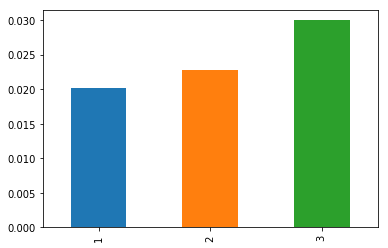

In [52]:
value.plot(kind='bar')

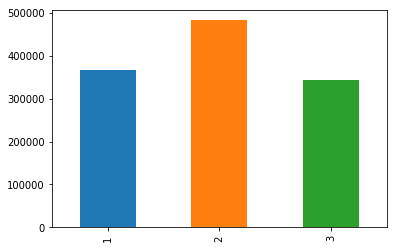

In [30]:
temp['Year'].value_counts().sort_index(ascending=True).plot(kind="bar")

In [ ]:
print(sum(df['NQ31B1'] == 1))
print(sum(df['NQ31B1'] == '1'))
print(sum(df['NQ31B1'] != 1))
print(sum(df['NQ31B1'] != '1'))

In [ ]:
df2['NQ31B1'].dtypes

In [ ]:
df1['NQ31B1'].dtypes

In [ ]:
df.head()

In [ ]:
df['Year'] = 1

In [ ]:
df1.index

In [ ]:
df1['Year'] = 2

In [ ]:
df1.shape

In [ ]:
df1.head()

In [ ]:
df2['Year'] = 3

In [ ]:
df2.shape

In [ ]:
df2.head()

In [ ]:
data_ocd = pd.concat([df,df1,df2],axis=0,sort = False)

In [ ]:
data_ocd['Year'].head(100)

In [ ]:
data_ocd['NQ31B1'].astype('int32')

In [ ]:
data_ocd['Year'].size

In [ ]:
data_ocd.loc['a'].head()

In [ ]:
print(sum(data_ocd['NQ31B1'] == '1'))
print(sum(data_ocd['NQ31B1'] == 1))
print(sum(data_ocd['NQ31B1'] != '1'))
print(sum(data_ocd['NQ31B1'] != 1))
print(203957+80437+970+2118824)

print(sum(data_ocd['Year'] == 1))
print(sum(data_ocd['Year'] == 2))
print(sum(data_ocd['Year'] == 3))
print(453 + 880444 + 1238897)

In [ ]:
ocd_treatment = data_ocd[['NQ31B1','Year']]
print(ocd_treatment['NQ31B1'].size)

g = ocd_treatment[(ocd_treatment['NQ31B1'] != '1') & (ocd_treatment['NQ31B1'] != ' ')]
#ocd_treatment[358034]
print(g)
print(g.size)
print(g['Year'].value_counts())
print(sum(g['Year'].value_counts()))